# testing different models

In [25]:
import torch
from torch.utils.data import DataLoader
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import configs

from shallowNeuralNetwork import NeuralNetwork

In [26]:
from configs import device

In [27]:
test_data = datasets.MNIST(
    configs.dataset_path,
    download=False,
    transform=ToTensor(),
)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True, pin_memory=True, pin_memory_device='cuda')

In [28]:

def visual_test(model, test_data):
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3,3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(test_data), size=(1,)).item()
        img, label = test_data[sample_idx]
        cuimg = torch.tensor(img).to('cuda')
        pred = model(cuimg)
        pred_label = pred.argmax(1).item()
        figure.add_subplot(rows, cols, i)
        plt.title(f"pred: {pred_label} actual:{label}")
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

def test_loop(dataloader: torch.utils.data.DataLoader, model: torch.nn.Module, loss_fn: torch.nn.Module):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            X: torch.Tensor = X.to(device)
            y: torch.Tensor = y.to(device)
            y_pred: torch.Tensor = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
            correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


### Loading saved models for testing

In [29]:
model: NeuralNetwork = torch.load('./trained_models/shallowNN90%.pth', weights_only=False)


/tmp/ipykernel_130196/1955792045.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cuimg = torch.tensor(img).to('cuda')


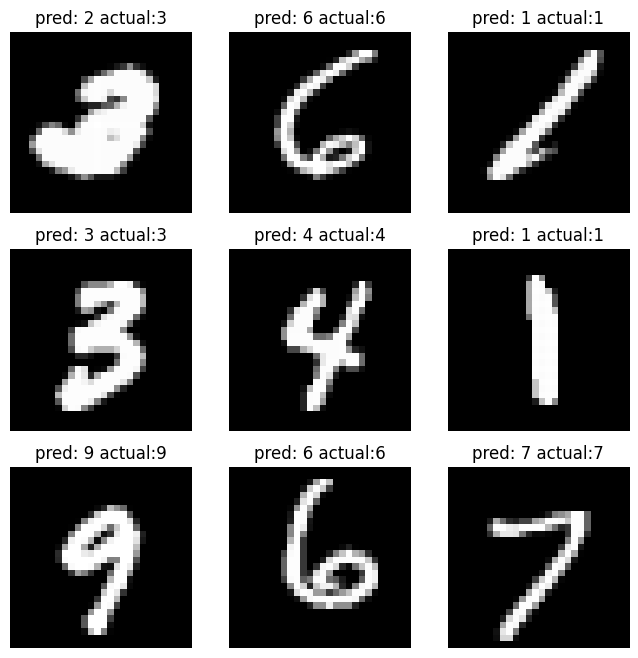

In [30]:
visual_test(model, test_data)

In [31]:
loss_fn = nn.CrossEntropyLoss()
test_loop(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 91.0%, Avg loss: 1.565133 



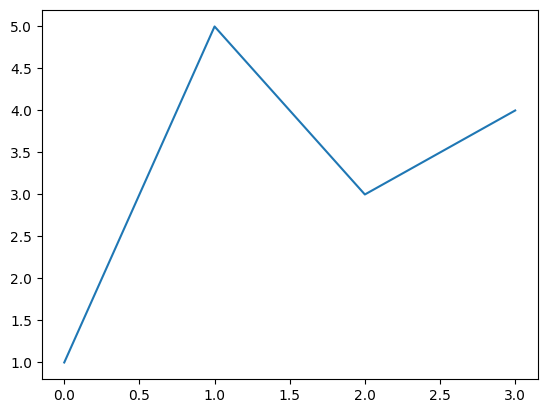

In [32]:
plt.plot([1,5,3,4],)

In [34]:
shallowWeights = list(model.named_parameters())